## Indice contenuti
- [Analisi esplorativa del dataset](#Analisi-esplorativa-del-dataset)
    - [Descrizione del dataset](#Descrizione-del-dataset)
    - [Caricamento in memoria del dataset](#Caricamento-in-memoria-del-dataset)
    - [Preprocessing](#Preprocessing)
    - [Matrice di correlazione di Pearson](#Matrice-di-correlazione-di-Pearson)
    - [Distribuzione dei dati per feature "brand"](#Distribuzione-dei-dati-per-feature-"brand")
- [Grafici](#Grafici)
    - [Boxplot](#Boxplot)
    - [Jointplot](#Jointplot)
    - [Pairplot](#Pairplot)
- [PCA (Principal Component Analysis)](#PCA-(Principal-Component-Analysis))
     - [Dichiarazione della feature target](#Dichiarazione-della-feature-target)
     - [Standardizzazione dei dati](#Standardizzazione-dei-dati)
     - [Split del dataset](#Split-del-dataset)
     - [Applicazione della PCA](#Applicazione-della-PCA)
- [Percettrone](#Percettrone)
- [Linear Discriminant Analysis](#Linear-Discriminant-Analysis)
- [Regressione Lineare](#Regressione-Lineare)
- [Regressione Polinomiale](#Regressione-Polinomiale)
- [Regressione Logistica](#Regressione-Logistica)
- [Regressione mediante Random Forest](#Regressione-mediante-Random-forest)
- [Utilizzo di metodi regolarizzati per la regressione](#Utilizzo-di-metodi-regolarizzati-per-la-regressione)
    - [Ridge Regression](#Ridge-Regression)
    - [Lasso Regression](#Lasso-Regression)
    - [Elastic Net](#Elastic-Net)
- [Decision Tree](#Decision-Tree)
- [Random Forest](#Random-Forest)
- [K-nearest Neighbor](#K-nearest-Neighbor)
- [Gaussian Naive Bayes](#Gaussian-Naive-Bayes)
- [Support Vector Machine](#Support-Vector-Machine)
- [Matrice di confusione per K-nn](#Matrice-di-confusione-per-K-nn)
     
<hr>

## Analisi esplorativa del dataset

In [1]:
#Import delle librerie richieste per il funzionamento
import itertools
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline

## Descrizione dataset

Per costruire i differenti modelli, verrà utilizzato il dataset <a href="https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)">Breast Cancer Wisconsin</a> riguardante esempi di casi clinici circa il cancro.

Di seguito sono riportate le features presenti:
 1. Sample code number: id number
 2. Clump Thickness: 1 - 10
 3. Uniformity of Cell Size: 1 - 10
 4. Uniformity of Cell Shape: 1 - 10
 5. Marginal Adhesion: 1 - 10
 6. Single Epithelial Cell Size: 1 - 10
 7. Bare Nuclei: 1 - 10
 8. Bland Chromatin: 1 - 10
 9. Normal Nucleoli: 1 - 10
 10. Mitoses: 1 - 10
 11. Class: (2 for benign, 4 for malignant)
   
Per ciascun algoritmo di tipo Ensemble, si utilizzerà al fine della valutazione sui dati non visti una 10-Fold Cross Validation.

### Caricamento in memoria del dataset

Con il seguente comando si effettua il caricamento di quanto contenuto nel dataset _'breast-cancer-wisconsin.data'_:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

col_names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
dataset = pd.read_csv('../input/breast-cancer-csv/breastCancer.csv', header=0, names = col_names)
array = dataset.values

dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#Rimozione della feature _Sample code number_
dataset.drop(['Sample code number'],axis = 1, inplace = True)

### Pre-processing del dataset

Per ottenere informazioni statistiche inerenti ciascuna feature a disposizione, mediante il metodo _describe()_ si è provveduto al calcolo delle seguenti informazioni:
- <b>count</b>: conteggio del numero di esempi per la feature selezionata
- <b>mean</b>: media aritmetica per la feature selezionata
- <b>std</b>: deviazione standard per la feature selezionata
- <b>min</b>: valore minimo presentato dagli esempi per la feature selezionata
- <b>25%</b>: primo quartile calcolato sugli esempi per la feature selezionata
- <b>50%</b>: secondo quartile calcolato sugli esempi per la feature selezionata
- <b>75%</b>: terzo quartile calcolato sugli esempi per la feature selezionata
- <b>max</b>: valore massimo presentato dagli esempi per la feature selezionata

In [4]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Al fine di ottenere una descrizione complessiva del Dataframe (e dunque del relativo dataset) caricato, mediante il metodo _info()_ si sono ottenute le seguenti informazioni:
- <b>#</b>: numero di feature presente nel DataFrame
- <b>Column</b>: intestazione delle features nel DataFrame
- <b>Non-Null Count</b>: contatore di valori non nulli per ogni feature presente nel DataFrame
- <b>Dtype</b>: tipo di dato memorizzato per ogni feature presente nel DataFrame

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


### Gestione valori nulli

Dal metodo _info()_ si evince che per la feature _Bare Nuclei_ ci sono dei valori che fanno divenire il tipo di dati da int64 a object. Infatti, analizzando il contenuto della feature _Bare Nuclei_ si evince la presenza di valori _?_.
Al fine di trattare valori mancanti, si utilizzerà la _Mean Imputation_ mentre per la gestione di tali caratteri ? verrà convertito tale valore con 0.

In [6]:
dataset.replace('?',0, inplace=True)

In [7]:
from sklearn.impute import SimpleImputer
# Conversione del DataFrame in array NumPy per applicare il metodo Imputer().
values = dataset.values

imputer = SimpleImputer()
imputedData = imputer.fit_transform(values)

### Normalizzazione delle features
Vista la presenza di dati espressi su un diverso range numerico, si effettua la standardizzazione, mediante apposito metodo StandardScaler().

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [9]:
#Split del dataset in X e Y
X = normalizedData[:,0:9] #Esclude la colonna relativa alla classe
Y = normalizedData[:,9] #Considera esclusivamente la classe come feature target

#Impostazione del seed
seed = 1

### Matrice di correlazione di Pearson

Al fine di condurre una analisi completa, di seguito è riportata la matrice di correlazione di Pearson che prende in considerazione le differenti features presenti all'interno del DataFrame.

I valori presenti all'interno della matrice di correlazione saranno espressi mediante valore decimale nell'intervallo [-1,+1] che rispettivamente indicherà la presenza di una correlazione inversa oppure una correlazione diretta.

Nel caso in cui il valore calcolato di correlazione sia vicino al valore 0, non è possibile definire la presenza di correlazione tra le features considerate.

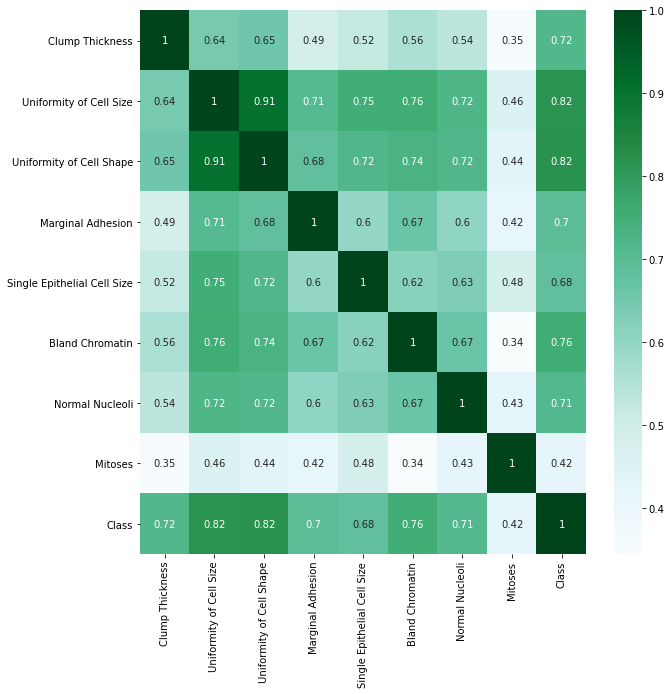

In [10]:
names = dataset.columns

# plot correlation matrix
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BuGn)
plt.show()

## PCA (Principal Component Analysis)

L'analisi delle componenti principali (PCA) è una tecnica che consente l'estrazione di informazioni rilevanti da un insieme di dati numerici. Consente, inoltre, di rivelare l'esistenza di relazioni lineari (nascoste) in dati multidimensionali.</br>
La PCA, inoltre, consente di effettuare la _low rank approximization_ di una matrice di dati.

PCA, in presenza di dataset ad alta dimensionalità, consente di ridurre quest'ultima in, generalmente, 2 o 3 dimensioni consentendo la rappresentazione di dati multivariati su grafici 2D o 3D.

Un open problem relativo a questa tecnica è l'individuazione del numero di componenti principali da considerare: solitamente, attraverso uno scree plot, si individua il gomito del plotting e quest'ultimo indicherà il numero delle componenti principali da considerare. Alternativamente, è possibile definire una percentuale di varianza spiegata dei dati [70%-90%] che verrà raggiunta sommando le varianze di ogni componente principale identificata, poste in ordine decrescente.

Ulteriore metodologia, invece, è rappresentata dal cerchio delle correlazioni che è una rappresentazione grafica utile per avere una idea delle variabili che contribuiscono positivamente o negativamente a spiegare la varianza della PC1 e PC2. Valori di loadings grandi associati a specifiche variabili indicano il contributo di queste ultime rispetto alle PC's.

Mediante il metodo di Kaiser, invece, è possibile ottenere euristicamente la stima del numero delle PC's da considerare prendendo in considerazioni gli autovalori che presentano un valore numerico maggiore di 1.

### Dichiarazione della feature target

Una volta caricato il dataset, al fine di poter applicare la PCA, si identifica con _y_ la feature target, ovvero _brand_, mentre X rappresenterà tutte le restanti features presenti all'interno del dataset.

In [11]:
from sklearn.model_selection import train_test_split

y = dataset['Class']
dataset.drop(['Class'], axis = 1, inplace = True)

### Standardizzazione dei dati

Onde evitare problemi circa la presenza di dati espressi su un diverso range numerico, come fase di pre-processing è stata introdotta la standardizzazione, mediante apposito metodo _StandardScaler()_ applicata su X.

In [12]:
from sklearn.preprocessing import StandardScaler
x = dataset

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

### Split del dataset

Per valutare le prestazioni del modello sfruttando i dati a disposizione, il dataset di partenza viene suddiviso nel seguente modo:
- 70%: dataset di training
- 30%: dataset di test

Poichè è stata già definita la feature target (_y_), tale suddivisione avviene anche per tale vettore.

Per evitare, inoltre, un possibile overfitting del modello basato sulla disposizione ingenua dei dati all'interno del dataset, viene effettuato uno shuffle randomico, impostando il parametro _shuffle_=True.

In [13]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42, shuffle=True)

### Applicazione della PCA

Per l'applicazione della PCA, si è provveduto ad usare il rispettivo metodo _fit()_ che consente il fitting del modello mediante gli esempi contenuti nella matrice X di training, identificata con il nome di _x\_train_.

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)

PCA()

Per ottenere il grafico relativo alla varianza spiegata da ogni componente è stato sviluppato il seguente codice che consente, a fronte del modello fittato, di ottenere in forma grafica la varianza per ciascuna componente (per identificare il "gomito") mentre, a destra, è riportato il plot della varianza cumulativa spiegata.

Come è possibile notare dal primo grafico, seppure il "gomito principale" sia presente sulla terza componente, per le ulteriori vi è la presenza di una varianza spiegata non indifferente. Pertanto, mediante prove analitiche svolte, si è preferito prendere in considerazione le prime 3 componenti principali che, in ogni caso, vanno a ridurre la dimensionalità del dataset di partenza.</br>

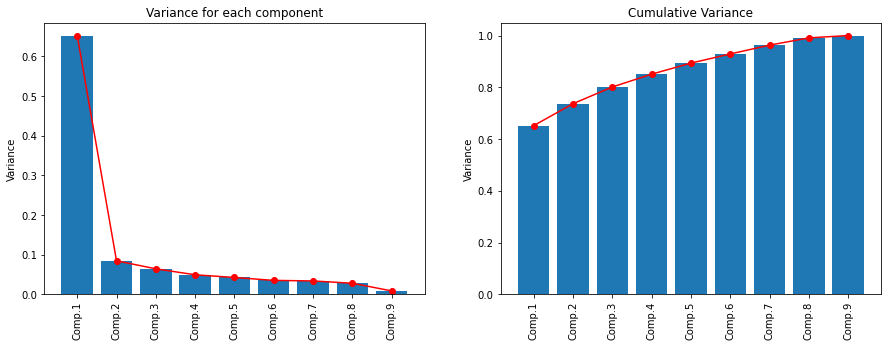

In [15]:
asse_y = pca.explained_variance_ratio_
asse_x = np.arange(len(asse_y)) + 1

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(asse_x, asse_y)
plt.plot(asse_x, asse_y, "ro-")
plt.title("Variance for each component")
plt.xticks(asse_x, ["Comp."+str(i) for i in asse_x], rotation=90)
plt.ylabel("Variance")

y2 = np.cumsum((pca.explained_variance_ratio_))

plt.subplot(1, 2, 2)
plt.bar(asse_x,y2)
plt.plot(asse_x, y2, "ro-")
plt.xticks(asse_x, ["Comp."+str(i) for i in asse_x], rotation=90)
plt.title("Cumulative Variance")
plt.ylabel("Variance")
plt.show()

Ottenuto il grafico delle varianze spiegate per ogni singola componente, il numero delle componenti principali da prendere in considerazione è fissato a 3 (per le motivazioni sopra riportate).

Fissato il numero delle componenti, si effettua il fitting del modello e la trasformazione della matrice X di train (identificata con _x\_train_) e della matrice X di test (_x\_test_)

Si procede, successivamente alla stampa delle seguenti informazioni:
- Componenti identificate dalla PCA
- Varianza spiegata da ciascuna componente
- Varianza spiegata in percentuale da ciascuna componente
- Valori singolari identificati

In [16]:
pca = PCA(n_components=5)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

#Stampa dei valori della PCA
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.singular_values_>=1)

[[ 0.2969142   0.37845649  0.38091446  0.31899759  0.34143385  0.34837921
   0.36541481  0.33405807  0.19669629]
 [-0.10397204 -0.05273015 -0.10044127 -0.12264138  0.20970355 -0.18343615
  -0.23293309  0.08147002  0.90706141]
 [-0.85691868  0.0280762  -0.03908356  0.41818028  0.14266065 -0.08611377
   0.20093316  0.13165465 -0.05500098]
 [ 0.04661901 -0.22998732 -0.21902731  0.48223385 -0.40651748  0.56351586
   0.00437552 -0.32844771  0.27148926]
 [-0.10477865  0.02377163  0.03801995 -0.09711918  0.67820526  0.32026084
  -0.23067511 -0.58987596 -0.11783317]]
[5.88281792 0.76414107 0.58184592 0.44627808 0.38530449]
[0.65221378 0.08471847 0.06450785 0.04947777 0.04271778]
[53.57998827 19.31064059 16.85054329 14.75749658 13.7123517 ]
[ True  True  True  True  True]


## Plot di Accuracy

### Grid Search

### Random Search
La Random Search è sorprendentemente efficiente rispetto alla Grid Search. Sebbene la Grid Search alla fine troverà il valore ottimale degli iperparametri (supponendo che siano nella griglia), la Random Search di solito troverà un valore "abbastanza vicino" in molte meno iterazioni.

La ricerca Grid Search troppo tempo a valutare regioni poco promettenti dello spazio di ricerca dell'iperparametro perché deve valutare ogni singola combinazione nella griglia. La Random Search, al contrario, fa un lavoro migliore nell'esplorare lo spazio di ricerca e quindi di solito può trovare una buona combinazione di iperparametri in molte meno iterazioni.

La Random Search dovrebbe probabilmente essere il primo metodo di ottimizzazione degli iperparametri provato per la sua efficacia. Anche se si tratta di un metodo che non si basa sui risultati delle valutazioni precedenti, la Random Search di solito può ancora trovare valori migliori rispetto a quella predefinita ed è semplice da eseguire.

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_accuracy(used_model, best_config_gs, best_config_random_search):
    model = used_model(**best_config_gs)

    #Suddivisione delle dimensioni del training_set e raccoglimento del training_score e test_score
    #Impostando il valore di cross_validation = 10

    #Train_sizes: controlla il numero assoluto o relativo di esempi di training utilizzati per generare le curve di apprendimento. 
    #train_sizes = np.linspace (0.1, 1.0, 10) per usare 10 punti equidistanti per le dimensioni del set di dati di allenamento.
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=model,
                                   X=x_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=10,
                                   n_jobs=-1)

    #Calcolo delle medie e delle deviazioni standard sul training e test
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    #Plot dei valori della GridSearch() sul grafico
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    
    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='Training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation accuracy')

    #la funzione fill_between indica la varianza della stima colorando la regione di piano
    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.3, 1.03])
    plt.tight_layout()
    
    #RandomSearch e relativo grafico
    model = used_model(**best_config_random_search)

    #Suddivisione delle dimensioni del training_set e raccoglimento del training_score e test_score
    #Impostando il valore di cross_validation = 10

    #Train_sizes: controlla il numero assoluto o relativo di esempi di training utilizzati per generare le curve di apprendimento. 
    #train_sizes = np.linspace (0.1, 1.0, 10) per usare 10 punti equidistanti per le dimensioni del set di dati di allenamento.
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=model,
                                   X=x_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=10,
                                   n_jobs=-1)

    #Calcolo delle medie e delle deviazioni standard sul training e test
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.subplot(1, 2, 2)
    #Plot dei valori della GridSearch() sul grafico
    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='Training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation accuracy')

    #la funzione fill_between indica la varianza della stima colorando la regione di piano
    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.3, 1.03])
    plt.tight_layout()
    
    plt.show()

## Percettrone

Implementa un modello che prevede l'utilizzo di un percettrone, il concetto alla base delle reti neurali.
Tale percettrone in fase di training viene inizializzato con dei pesi, i quali vengono utilizzati per fare predizione.
In base ai risultati ottenuti, ad ogni iterazione viene calcolata una perdita (loss), che indica il tasso di errore che si sta commettendo nella predizione.
In base a tale metrica, vengono poi modificati i pesi in base alla funzione di attivazione che si sta utilizzando, realizzando una tecnica nota come back-propagation.

L'apprendimento termina quando si raggiunge una soglia minima di errore pre-impostata, o quando si raggiunge un numero massimo di iterazioni.

Parametri testati:
- <b>tol</b>: Criterio di stop. Le iterazioni terminano quando loss > previous_loss - tol.
- <b>eta0</b>: Costante con la quale gli updates sono moltiplicati
- <b>penality</b>: termine di regolarizzazione da usare:
    - <b>l2</b>
    - <b>l1</b>
    - <b>elasticnet</b>

GridSearch():

Per l'applicazione della GridSearch ci sono 48 combinazioni
Migliore configurazione:  {'eta0': 1, 'penalty': 'l2', 'tol': 0.001}
Accuracy CV: 0.9693035977277509
Test accuracy: 0.952


RandomizedSearch():

Migliore configurazione:  {'tol': 0.001, 'penalty': 'elasticnet', 'eta0': 1}
Accuracy CV: 0.9693035977277509
Test accuracy: 0.952


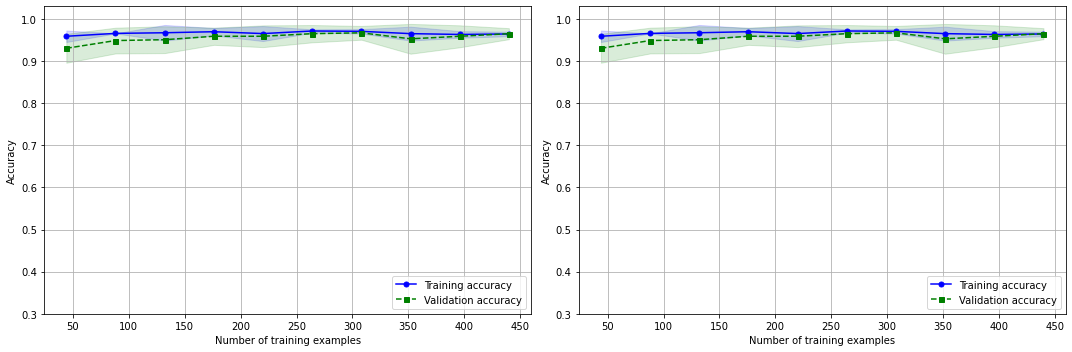

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

grid={'tol':[0.001,0.01,0.1,1], 'eta0': [0.001,0.01,0.1,1], 'penalty': ['l2','l1','elasticnet']}

ppn = Perceptron(random_state=1, n_jobs = -1, max_iter=1000)
ppn_cv=GridSearchCV(ppn,grid,cv=5)
ppn_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",ppn_cv.best_params_)
best_config_gs = ppn_cv.best_params_
print("Accuracy CV:",ppn_cv.best_score_)
ppn_cv = ppn_cv.best_estimator_
print('Test accuracy: %.3f' % ppn_cv.score(x_test, y_test))


#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(ppn, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(Perceptron, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

## Linear Discriminant Analysis

Un classificatore lineare con un confine di decisione generato dal fitting delle densità condizionali ai dati usando la regola di Bayes.

Il modello fitta una densità Gaussiana per ogni classe, assumendo che tutte le classi condividono la stessa matrice di covarianza.

Il modello fittato può anche essere usato per ridurre la dimensionalità dell'input proiettando le sue direzioni più discriminative, utilizzando il metodo transform.

Attraverso LDA si sfrutta la conoscenza delle classi (variabile target del problema). In particolare, si sfrutta la matrice X delle features e le informazioni che si hanno sulle Y.
Si deve risolvere un problema di classificazione. L'obiettivo è di porre un altro vincolo: la proiezione deve tenere le classi separate tra loro.
L’obiettivo è di trovare la direzione w che vada a massimizzare la distanza (favorendo la separazione tra le due classi), minimizzando la varianza (presente al denominatore, massimizzando la coesione all'interno della classe.)
•  m1 (la proiezione) si ottiene da w e dalla media dell'intera classe 1. 
•  Idem anche su m2
•  Il denominatore è calcolato mediante gli scarti quadratici med

In contrasto con PCA, LDA tenta di trovare un sottospazio di features che massimizzi la separabilità delle classi.
LDA fa ipotesi su classi distribuite normalmente e covarianze di classi uguali.
(La PCA tende a produrre risultati di classificazione migliori in un'attività di riconoscimento delle immagini se il numero di campioni per una data classe era relativamente piccolo.)

Parametri testati:
- <b>solver</b>: risolutore da utilizzare. Si può scegliere tra:
    - <b>svd (default)</b>:  singular value decomposition. Non viene calcolata la matrice di covarianza, tuttavia è necessario modificare questo parametro quando si è in presenza di un gran numero di features.
    - <b>lsqr</b>: soluzione ai minimi quadrati
    - <b>eigen</b>: decomposizione di autovalori
- <b>tol</b>: soglia in valore assoluto per i valori singolari da considerare significanti in X. Le dimensioni i cui valori singolari non sono significanti sono scartati. Può essere utilizzato solo con svd.
- <b>n_components</b>: numero di componenti da tenere in considerazione per la riduzione della dimensionalità.

GridSearch():

Per l'applicazione della GridSearch ci sono 8 combinazioni
Migliore configurazione:  {'solver': 'lsqr', 'tol': 0.001}
Accuracy CV: 0.9590784767515255
Test accuracy: 0.967


RandomizedSearch():

Migliore configurazione:  {'tol': 0.001, 'solver': 'lsqr'}
Accuracy CV: 0.9590784767515255
Test accuracy: 0.967


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


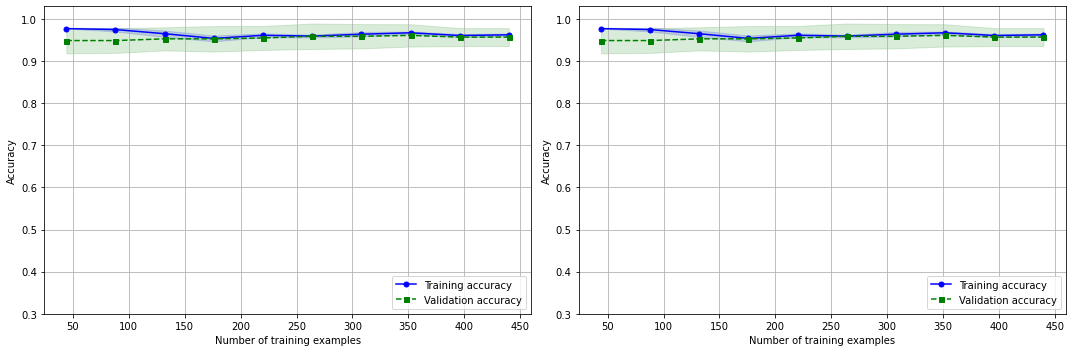

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

x_train_lda = x_train
y_train_lda = y_train


grid={'solver': ['lsqr', 'eigen'], 'tol':[0.001,0.01,0.1,1]}

lda = LDA()
lda_cv=GridSearchCV(lda,grid,cv=5)
lda_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",lda_cv.best_params_)
best_config_gs = lda_cv.best_params_
print("Accuracy CV:",lda_cv.best_score_)
lda_cv = lda_cv.best_estimator_
print('Test accuracy: %.3f' % lda_cv.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(lda, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(LDA, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

## Regressione Lineare

La regressione lineare è una tecnica di analisi predittiva di base che utilizza dati raccolti per prevedere una variabile di output. </br>L'idea alla base della regressione lineare è che se risulta possibile adattare un modello di regressione lineare ai casi osservati, allora è possibile utilizzare tale modello per prevedere eventuali valori futuri.

Per semplicità si descrive il funzionamento di un modello di regressione lineare semplice:

In un modello di regressione lineare esistono due tipi di variabili:
- <b>Variabile di input</b>: sono le variabili che aiutano a prevedere il valore della variabile di output. Viene comunemente indicata con X
- <b>Variabile di output</b>: è la variabile che si vuole prevedere. Viene comunemente indicata con Y.

Per stimare Y, usando la regressione lineare, si sfrutta la seguente equazione: ${Y\_predicted = a0+a1*X}$.</br>L'obiettivo è trovare valori statisticamente significativi dei parametri $a0$ e $a1$ che minimizzino la differenza tra $Y$ e $Y\_predicted$ sfruttando una tecnica di minimizzazione dell'errore.</br>
Se si è in grado di determinare i valori ottimali per tali parametri, allora si otterrà la retta di _best fit_ che è possibile utilizzare per prevedere i valori di Y dato X.

Nel seguente snippet di codice viene utilizzato il modello LinearRegressione della libreria sklearn per trovare la migliore retta di regressione, minimizzando i quadrati dei residui.
In questo caso, non si tratta di regressione lineare semplice perchè i dati in input sono multidimensionali.

In [20]:
from sklearn import linear_model

regr = linear_model.LinearRegression(n_jobs = -1)
regr.fit(x_train, y_train)

print('Accuracy of Linear regression classifier on training set: {:.2f}'
     .format(regr.score(x_train, y_train)))
print('Accuracy of Linear regression classifier on test set: {:.2f}'
     .format(regr.score(x_test, y_test)))

Accuracy of Linear regression classifier on training set: 0.83
Accuracy of Linear regression classifier on test set: 0.83


## Regressione Polinomiale

La regressione polinomiale utilizza lo stesso metodo della regressione lineare, ma assume che la funzione che meglio descrive l’andamento dei dati non sia una retta (lineare), ma un polinomio (curva). Quindi è adatta quando lo scatterplot di una relazione bivariata, ad esempio, mostra una forma diversa da quella della retta, ad esempio una curva.

Per adempiere alla realizzazione del task di regressione polinomiale è stato realizzato un apposito snippet:

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=3)
x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression(n_jobs = -1)
model.fit(x_poly_train, y_train)

print('Accuracy of Linear regression classifier on training set: {:.2f}'
     .format(model.score(x_poly_train, y_train)))
print('Accuracy of Linear regression classifier on test set: {:.2f}'
     .format(model.score(x_poly_test, y_test)))

Accuracy of Linear regression classifier on training set: 0.89
Accuracy of Linear regression classifier on test set: 0.78


## Regressione Logistica

La regressione logistica è uno degli algoritmi di apprendimento automatico più semplici e comunemente utilizzati per la classificazione a due classi. È facile da implementare e può essere utilizzata come base per qualsiasi problema di classificazione binaria.

Lo scopo di questo algoritmo è quello di descrivere e stimare la probabilità di una variabile dipendente categorica da una o più variabili indipendenti. La variabile dipendente è una variabile binaria che contiene dati codificati come 1 (sì, successo, ecc.) o 0 (no, errore, ecc.). In altre parole, il modello di regressione logistica prevede P (Y = 1) come funzione di X.


Nel caso rappresentato in seguito, si è in presenza di Regressione Logistica Multinomiale, in quanto le variabili da predire non sono dicotomiche, ma possono assumere più di due valori.
Per testare i molteplici parametri del modello _logreg_ è stata utilizzata la GridSearchCV() per ottenere la configurazione migliore del settaggio dei parametri da utilizzare.

Parametri testati:
- <b>solvers</b>: indica l'algoritmo da utilizzare nel problema di ottimizzazione
- <b>multi_class</b>:
    - <b>ovr</b>: viene fittato un problema binario per ogni etichetta.
    - <b>multinomial</b>: la loss minimizzata è la loss multinomiale fittata su tutta la distribuzione di probabilitù, anche quando i dati sono binari.
    - <b>auto (default)</b>: viene selezionato il miglior parametro automaticamente
- <b>C</b>: Inverso della potenza di regolarizzazione, inteso come float positivo. Valori più piccoli indicano una regolarizzazione più forte.

GridSearch():

Per l'applicazione della GridSearch ci sono 60 combinazioni
Migliore configurazione:  {'C': 10, 'multi_class': 'auto', 'solver': 'newton-cg'}
Accuracy CV: 0.9631601094045866
Test accuracy: 0.962


RandomizedSearch():

Migliore configurazione:  {'solver': 'newton-cg', 'multi_class': 'ovr', 'C': 50}
Accuracy CV: 0.9631601094045866
Test accuracy: 0.962


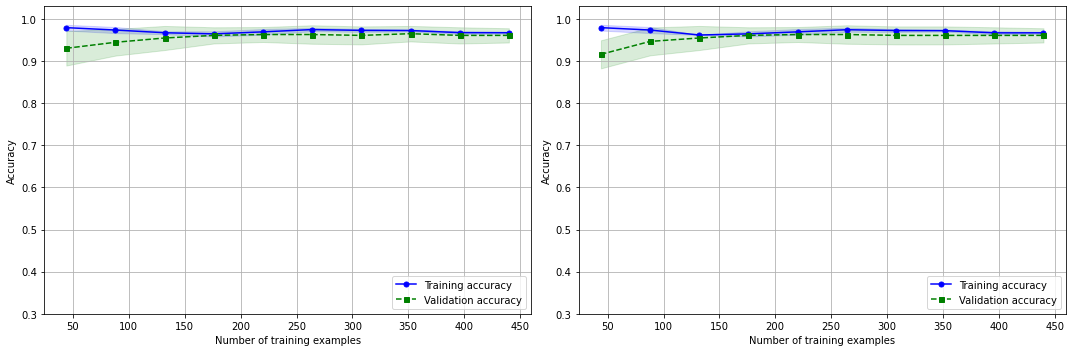

In [22]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
multiclass_values = ['auto', 'ovr', 'multinomial']
C = [x for x in range(10,100+1,20)]

grid={'solver':solvers, 'multi_class':multiclass_values, 'C':C}
logreg=LogisticRegression(random_state=1, max_iter=500)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",logreg_cv.best_params_)
best_config_gs = logreg_cv.best_params_
print("Accuracy CV:",logreg_cv.best_score_)
logreg_be = logreg_cv.best_estimator_
print('Test accuracy: %.3f' % logreg_be.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(logreg, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(LogisticRegression, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

## Regressione mediante Random forest

Una Random Forest è un meta stimatore che si adatta ad una serie di alberi decisionali su vari sottocampioni del dataset e utilizza la media per migliorare l'accuratezza predittiva e il controllo dell'overfitting.

La differenza tra RandomForestClassifier e RandomForestRegressor, sta nel fatto che nel primo caso, viene utilizzato un classificatore per predire un insieme specificato di labels.

Nel secondo caso invece, viene utilizzato un regressore per predire valori reali, che possono variare e non appartengono ad un insieme limitato di valori che si possono assumere.

Parametri testati:
- <b>n_estimators</b>: numero di alberi nella foresta
- <b>criterion</b>: funzione per misurare la qualità di una divisione. I criteri supportati sono "mse" (errore quadratico medio) e "mae" (errore medio assoluto)
- <b>max_features</b>: numero di features da considerare quando si cerca la migliore suddivisione.

GridSearch():

Per l'applicazione della GridSearch ci sono 18 combinazioni
Migliore configurazione:  {'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 1500}
Accuracy CV: 0.8667596601153305
Test accuracy: 0.902


RandomizedSearch():

Migliore configurazione:  {'n_estimators': 2000, 'max_features': 'sqrt', 'criterion': 'mse'}
Accuracy CV: 0.862820175275208
Test accuracy: 0.909


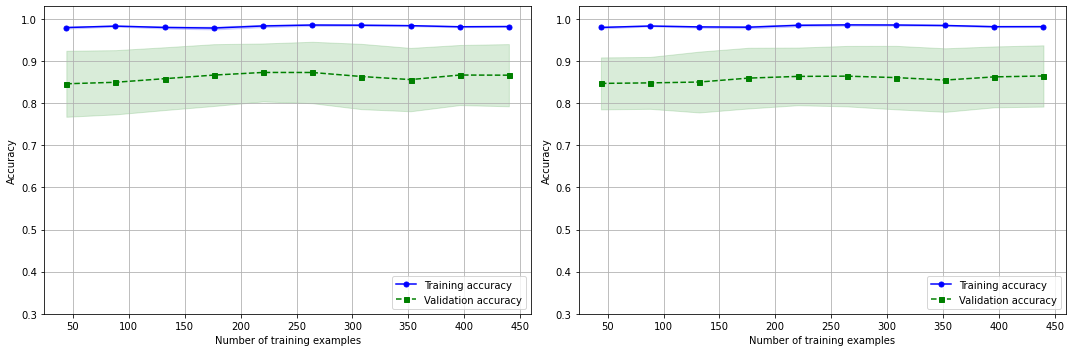

In [23]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid={'n_estimators':[x for x in range(1000,2000+1,500)], 'criterion':['mae','mse'], 'max_features':['auto', 'sqrt', 'log2']}
forest = RandomForestRegressor(random_state=1, n_jobs=-1)
forest_cv=GridSearchCV(forest,grid,cv=5)
forest_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",forest_cv.best_params_)
best_config_gs = forest_cv.best_params_
print("Accuracy CV:",forest_cv.best_score_)
forest_be = forest_cv.best_estimator_
print('Test accuracy: %.3f' % forest_be.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(forest, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(RandomForestRegressor, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

# Utilizzo di metodi regolarizzati per la regressione

Gli approcci popolari per i modelli lineare di regressione regolarizzata sono: Ridge Regression, least absolute shrinkage and selection operator (LASSO), and elastic Net.

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418451/tradeoff_sevifm.png)

### Ridge Regression

Questo modello è conosciuto anche come regressione della cresta o regolarizzazione di Tikhonov. Questo stimatore ha un supporto integrato per la regressione multi-variata, cioè quando y è un array multi-dimensionale.

E' un ottima soluzione da adottare quando si è in presenza multi-collinearità tra i vari esempi.

Dunque, Ridge aggiunge un fattore di penalizzazione (norma l2) alla cost function. Ciò determina la perdita di importanza del valore di una feature, che a seconda della penalità può essere più o meno accentuata. La forza della penalità è modificabile e controllata da un iperparametro.

Parametro utilizzato:
- <b>alpha</b>: forza di regolarizzazione. Migliora il condizionamento del problema. Valori più grandi specificano una regolarizzazione più forte.

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418449/eq7_ylxudw.png)

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.156, test: 0.152
R^2 train: 0.829, test: 0.825


### Lasso Regression

Una caratteristica fondamentale della Lasso regression riguarda la gestione delle feature di importanza minore.
Contrariamente alla Ridge regression, che minimizzando il peso di alcune feature ne riduce la contribuzione al modello, la lasso regression effettua una vera e propria feature selection (prendendo in considerazione solo le variabili indipendenti) portando le restanti a zero attraverso un opportuno valore di peso associato generando quindi un modello sparso.

A differenza di Ridge, Lasso penalizza la somma dei valori assoluti, ovvero la L1.

Parametro utilizzato:
- <b>alpha</b>: costante che moltiplica il termine l1.

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418448/eq11_ij4mms.png)

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

lasso.fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.350, test: 0.326
R^2 train: 0.618, test: 0.625


### Elastic Net

Elastic Net è emerso per la prima volta a seguito di una critica alla Lasso Regression, la cui feature selection potrebbe essere troppo dipendente dai dati, rendendo il modello instabile.

La soluzione è quella di combinare le penalità della regressione Ridge e Lasso per ottenere i vantaggi da entrambi i modelli.

Si utilizzano quindi due parametri regolarizzatori, che corrispondono rispettivamente alle funzioni di regolarizzazione di Ridge e Lasso regression.

Parametri utilizzati:
- <b>alpha</b>: costante che moltiplica il termine di penalità.
- <b>l1_ratio</b>: parametro di mix di elasticNet. Per l1_ratio=0 la penalità è la norma l2. Per l1_ratio=1 la penalità è la norma l1, altrimenti è una combinazione di l1 e l2.

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418448/eq12_vh6ilt.png)

In [28]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

elanet.fit(x_train, y_train)
y_train_pred = elanet.predict(x_train)
y_test_pred = elanet.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.246, test: 0.229
R^2 train: 0.732, test: 0.736


## Decision Tree

Gli alberi decisionali (DT) sono un metodo di apprendimento supervisionato non parametrico utilizzato per la classificazione e la regressione.
L'obiettivo è creare un modello che preveda il valore di una variabile target apprendendo semplici regole decisionali dedotte dalle caratteristiche dei dati.

Alcuni vantaggi degli alberi decisionali sono:
- Semplice da capire e da interpretare. Gli alberi possono essere visualizzati.
- Potrebbe richiedere poca preparazione dei dati. Altre tecniche spesso richiedono la normalizzazione dei dati, la creazione di variabili fittizie e la rimozione dei valori vuoti. Si noti tuttavia che questo modulo non supporta i valori mancanti.
- Il costo dell'utilizzo dell'albero (ovvero la previsione dei dati) è logaritmico nel numero di punti dati utilizzati per addestrare l'albero.
- In grado di gestire dati sia numerici che categoriali. Altre tecniche sono solitamente specializzate nell'analisi di set di dati che hanno un solo tipo di variabile. Vedi algoritmi per maggiori informazioni.
- In grado di gestire problemi con più output.
- Se una data situazione è osservabile in un modello, la spiegazione della condizione è facilmente spiegabile dalla logica booleana.
- Possibilità di validare un modello utilizzando test statistici. Ciò consente di tenere conto dell'affidabilità del modello.

Gli svantaggi degli alberi decisionali includono:
- Gli studenti che apprendono l'albero decisionale possono creare alberi troppo complessi che non generalizzano bene i dati. Questo si chiama overfitting. Per evitare questo problema sono necessari meccanismi come la potatura, l'impostazione del numero minimo di campioni richiesto su un nodo fogliare o l'impostazione della profondità massima dell'albero.
- Gli alberi decisionali possono essere instabili perché piccole variazioni nei dati potrebbero comportare la generazione di un albero completamente diverso. Questo problema viene mitigato utilizzando alberi decisionali all'interno di un insieme.
- Il problema dell'apprendimento di un albero decisionale ottimale è noto per essere NP-completo sotto diversi aspetti dell'ottimalità e anche per concetti semplici. Di conseguenza, gli algoritmi pratici di apprendimento dell'albero decisionale sono basati su algoritmi euristici come l'algoritmo greedy in cui vengono prese decisioni ottimali a livello locale in ogni nodo. Tali algoritmi non possono garantire la restituzione dell'albero decisionale ottimale a livello globale. Ciò può essere mitigato addestrando più alberi in un gruppo di studenti, in cui le caratteristiche e i campioni vengono campionati in modo casuale con la sostituzione.
- Ci sono concetti che sono difficili da imparare perché gli alberi decisionali non li esprimono facilmente, come XOR, parità o problemi di multiplexer.
- Si potrebbero creare alberi sbilanciati. Si consiglia pertanto di bilanciare il set di dati prima di adattarlo all'albero decisionale.

Parametri testati:
- <b>criterion</b>: indica la funzione da utilizzare per la misurazione della qualità di uno split. I criteri supportati sono:
    - <b>gini</b>: misura di impurità
    - <b>entropy</b>: information gain
- <b>splitter</b>: la strategia usata per scegliere lo split ad ogni nodo. Le strategie supportate sono:
    - <b>best</b>: seleziona il miglior split
    - <b>random</b>: sceglie in modo casuale

GridSearch():

Per l'applicazione della GridSearch ci sono 4 combinazioni
Migliore configurazione:  {'criterion': 'entropy', 'splitter': 'best'}
Accuracy CV: 0.9508941721018305
Test accuracy: 0.933


RandomizedSearch():

Migliore configurazione:  {'splitter': 'random', 'criterion': 'gini'}
Accuracy CV: 0.9448138018093836
Test accuracy: 0.967


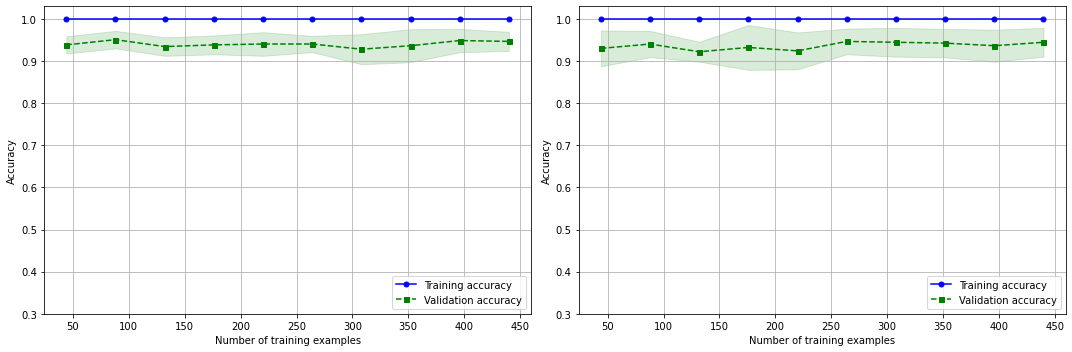

In [30]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


grid={'criterion':['gini','entropy'], 'splitter':['best', 'random']}

clf = DecisionTreeClassifier()
clf_cv=GridSearchCV(clf,grid,cv=5)
clf_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",clf_cv.best_params_)
best_config_gs = clf_cv.best_params_
print("Accuracy CV:",clf_cv.best_score_)
clf_be = clf_cv.best_estimator_
print('Test accuracy: %.3f' % clf_be.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 2
random_search = RandomizedSearchCV(clf, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(DecisionTreeClassifier, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

## Random Forest

Una foresta casuale (in inglese: random forest) è un classificatore d'insieme ottenuto dall'aggregazione tramite bagging di alberi di decisione.
Le foreste casuali si pongono come soluzione che minimizza l'overfitting del training set rispetto agli alberi di decisione.

Parametri testati:
- <b>n_estimators</b>: numero di alberi decisionali da utilizzare nella random forest
- <b>criterion</b>: indica la funzione da utilizzare per la misurazione della qualità di uno split. I criteri supportati sono:
    - <b>gini</b>: misura di impurità
    - <b>entropy</b>: information gain

GridSearch():

Per l'applicazione della GridSearch ci sono 20 combinazioni
Migliore configurazione:  {'criterion': 'entropy', 'n_estimators': 15}
Accuracy CV: 0.9651798863875447
Test accuracy: 0.967


RandomizedSearch():

Migliore configurazione:  {'n_estimators': 20, 'criterion': 'gini'}
Accuracy CV: 0.9631390700610141
Test accuracy: 0.967


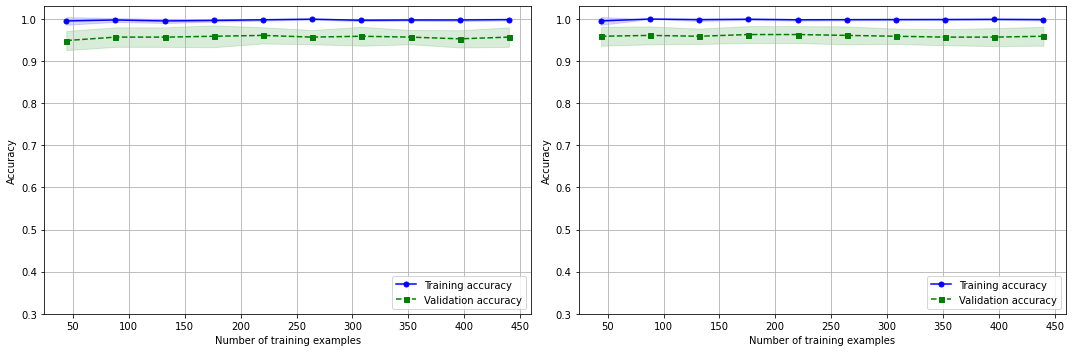

In [31]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

estimators = [x for x in range(5,50+1,5)]
criterion_list = ['gini','entropy']
grid={'n_estimators':estimators, 'criterion':criterion_list}

forest = RandomForestClassifier(random_state=1, n_jobs=-1)
forest_cv=GridSearchCV(forest,grid,cv=5)
forest_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",forest_cv.best_params_)
best_config_gs = forest_cv.best_params_
print("Accuracy CV:",forest_cv.best_score_)
forest_cv = forest_cv.best_estimator_
print('Test accuracy: %.3f' % forest_cv.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(forest, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(RandomForestClassifier, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

## K-nearest Neighbor

Il k-nearest neighbors (k-NN) è un algoritmo che di solito viene utilizzato nel riconoscimento di pattern per la classificazione di oggetti basandosi sulle caratteristiche degli oggetti vicini a quello considerato.

Un oggetto è classificato in base alla maggioranza dei voti dei suoi k vicini. k è un intero positivo tipicamente non molto grande. In un contesto binario in cui sono presenti esclusivamente due classi è opportuno scegliere k dispari per evitare di ritrovarsi in situazioni di parità.
Considerando solo i voti dei k oggetti vicini c'è l'inconveniente dovuto alla predominanza delle classi con più oggetti. In questo caso può risultare utile pesare i contributi dei vicini in modo da dare, nel calcolo della media, maggior importanza in base alla distanza dall'oggetto considerato.

La scelta di k dipende dalle caratteristiche dei dati. Generalmente all'aumentare di k si riduce il rumore che compromette la classificazione, ma il criterio di scelta per la classe diventa più labile. La scelta può esser presa attraverso tecniche euristiche, come ad esempio la cross validation.

Parametri testati:
- <b>algorithm</b>: algoritmo utilizzato per computare i migliori k vicini
    - <b>auto</b>: seleziona il miglior algoritmo automaticamente
    - <b>ball_tree</b>: utilizza un ballTree
    - <b>kd_tree</b>: utilizza un albero kd
    - <b>brute</b>: ricerca brute force
- <b>weights</b>: funzione di peso da utilizzare per la predizione
    - <b>uniform</b>: ciascun nodo ha lo stesso peso
    - <b>distance</b>: ciascun nodo viene pesato in base all'inverso della distanza con i suoi vicini
- <b>n_neighbors</b>: numero di vicini da tenere in considerazione

GridSearch():

Per l'applicazione della GridSearch ci sono 160 combinazioni
Migliore configurazione:  {'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'uniform'}
Accuracy CV: 0.9672207027140753
Test accuracy: 0.967


RandomizedSearch():

Migliore configurazione:  {'weights': 'uniform', 'n_neighbors': 17, 'algorithm': 'brute'}
Accuracy CV: 0.9651798863875447
Test accuracy: 0.971


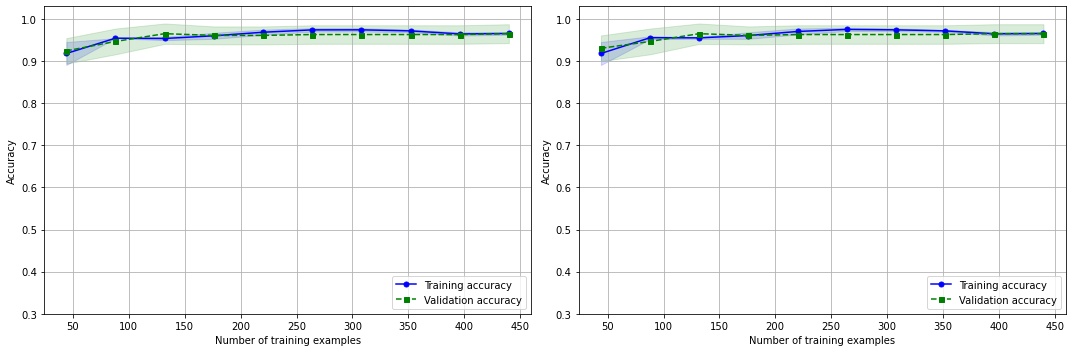

In [32]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


grid={'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights':['uniform', 'distance'], 'n_neighbors':[x for x in range(1,20+1)]}

knn = KNeighborsClassifier(n_jobs = -1)
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",knn_cv.best_params_)
best_config_gs = knn_cv.best_params_
print("Accuracy CV:",knn_cv.best_score_)
knn_cv = knn_cv.best_estimator_
print('Test accuracy: %.3f' % knn_cv.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 10
random_search = RandomizedSearchCV(knn, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(KNeighborsClassifier, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

## Gaussian Naive Bayes

Il teorema di Bayes proposto da Thomas Bayes, è utilizzato per calcolare la probabilità condizionata di un evento A, sapendo che si è verificato un evento B, a partire dalla conoscenza delle probabilità a priori degli eventi A e B e della probabilità condizionata di B noto A.
Il teorema di Bayes è utilizzato in molti campi, come nella diagnosi medica per calcolare la probabilità che un individuo sia affetto da una malattia sapendo che presenti determinati sintomi.

Considerando un insieme di variabili aleatorie indipendenti $A_1, ..., A_n$ che partizionano l'insieme degli eventi $\Omega$, la probabilità condizionata è definita come:
$$P(A_i|B) = \frac{P(B|A_i)P(A_i)}{P(B)} = \frac{P(B|A_i)P(A_i)}{\sum_{j=1}^nP(B|A_j)P(A_j)}$$

Dove:

- $P(A_i|B)$: probabilità condizionata di $A_i$ noto B. E' anche conosciuta come probabilità a posteriori visto che dipende dallo specifico valore di B.
- $P(B|A_i)$: probabilità condizionata di B noto $A_i$
- $P(A_i)$: probabilità a priori di $A_i$.
- $P(B)$: probabilità a priori di B, e funge da costante di normalizzazione, che permette di ottenre $P(A_i|B) = 1$ al variare di $i$.

L'espressione Naive Bayes ("ingenuo") indica il fatto che si fanno forti assunzioni di indipendenza nel modello. Si assume infatti che data una certa classe, ciascuna delle variabili aleatorie (features) siano indipendenti.
Formalmente quindi dato un vettore $B=(B_1, ..., B_n)$ si assume che sia verificata:
$$P(B_1, ..., B_n|A) = \prod_{i=1}^{n}P(B_i|A)$$
Questa assunzione di indipendenza però non sempre è verificata nella realtà, motivo per il quale è detto "Naive Bayes". Nonostante ciò, i modelli che utilizzano Naive Bayes funzionano sorprendentemente bene.

Questa particolarità sta a significare che la probabilità a posteriori:
$$P(A|B_1, ..., B_n) \propto P(A)P(B_1|A)...P(B_n|A)$$

Il teorema può essere rivisto in diverse maniere a seconda della distribuzione di probabilità delle varie variabili aleatorie.


Nel caso esposto nello snippet seguente, si utilizza Gaussian Naive Bayes, perchè si assume che le feature di cui si dispone seguano una distribuzione Gaussiana.

Per questo motivo, la probabilità a posteriori può essere calcolata di volta in volta mediante l'uso dell'equazione Gaussiana.

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.96


## Support Vector Machine

Support Vector Machine (SVM), sono dei modelli di apprendimento supervisionato associati ad algoritmi di apprendimento per la regressione e la classificazione. Dato un insieme di esempi per l'addestramento, ognuno dei quali etichettato con la classe di appartenenza fra le due possibili classi, un algoritmo di addestramento per le SVM costruisce un modello che assegna i nuovi esempi a una delle due classi, ottenendo quindi un classificatore lineare binario non probabilistico. Un modello SVM è una rappresentazione degli esempi come punti nello spazio, mappati in modo tale che gli esempi appartenenti alle due diverse categorie siano chiaramente separati da uno spazio il più possibile ampio. I nuovi esempi sono quindi mappati nello stesso spazio e la predizione della categoria alla quale appartengono viene fatta sulla base del lato nel quale ricade.

Oltre alla classificazione lineare è possibile fare uso delle SVM per svolgere efficacemente la classificazione non lineare utilizzando il metodo kernel, mappando implicitamente i loro ingressi in uno spazio delle features multi-dimensionale.

Quando gli esempi non sono etichettati è impossibile addestrare in modo supervisionato e si rende necessario l'apprendimento non supervisionato: questo approccio cerca d'identificare i naturali gruppi in cui si raggruppano i dati, mappando successivamente i nuovi dati nei gruppi ottenuti. L'algoritmo di raggruppamento a vettori di supporto, applica le statistiche dei vettori di supporto, sviluppate negli algoritmi delle SVM, per classificare dati non etichettati, ed è uno degli algoritmi di raggruppamento maggiormente utilizzato nelle applicazioni industriali.

Al fine di testare i differenti Kernel disponibili per SVC, è stata implementata una GridSearch con l'ausilio di una 10-Fold Cross Validation.

Parametri testati:
- <b>kernel</b>: specifica il tipo di kernel da utilizzare nell'algoritmo. I possibili valori sono:
    - <b>linear</b>
    - <b>poly</b>
    - <b>rbg (default)</b>
    - <b>sigmoid</b>
    - <b>precoumputed</b>

GridSearch():

Per l'applicazione della GridSearch ci sono 4 combinazioni
Migliore configurazione:  {'kernel': 'linear'}
Accuracy CV: 0.9692825583841784
Test accuracy: 0.967


RandomizedSearch():

Migliore configurazione:  {'kernel': 'linear'}
Accuracy CV: 0.9692825583841784
Test accuracy: 0.967


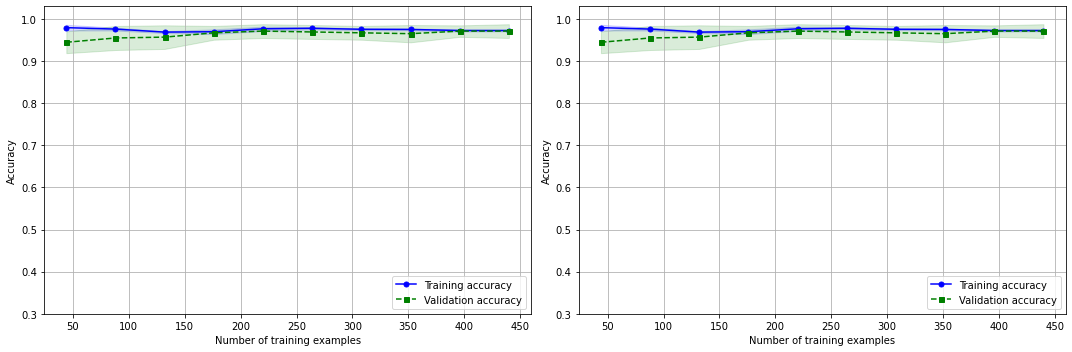

In [34]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

grid={'kernel':kernel_list}
svm=SVC()
svm_cv=GridSearchCV(svm,grid,cv=5)
svm_cv.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("GridSearch():\n")
combinazioni = 1
for x in grid.values():
    combinazioni *= len(x)
print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
print("Migliore configurazione: ",svm_cv.best_params_)
best_config_gs = svm_cv.best_params_
print("Accuracy CV:",svm_cv.best_score_)
svm_be = svm_cv.best_estimator_
print('Test accuracy: %.3f' % svm_be.score(x_test, y_test))

#RandomizedSearch
n_iter_search = 2
random_search = RandomizedSearchCV(svm, param_distributions=grid, n_iter=n_iter_search, cv=5, n_jobs =-1)
random_search.fit(x_train,y_train)

#Stampa degli attributi best_score sul modello e i parametri con cui quel 'best_score' è stato ottenuto
print("\n\nRandomizedSearch():\n")
print("Migliore configurazione: ",random_search.best_params_)
best_config_random_search = random_search.best_params_
print("Accuracy CV:",random_search.best_score_)

random_search = random_search.best_estimator_
print('Test accuracy: %.3f' % random_search.score(x_test, y_test))

plot_accuracy(SVC, best_config_gs, best_config_random_search) #Stampo il grafico dell'accuratezza

## Matrice di confusione per K-nn

Dopo aver visionato l'accuratezza di ciascun classificatore, è possibile affermare che il K-nearest Neighbor ha restituito la maggiore accuratezza rispetto a tutti i modelli di classificazione testati.

Pertanto, per esso è definita la matrice di confusione con le relative metriche di valutazione del modello.

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn_cv.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[140   3]
 [  4  63]]
              precision    recall  f1-score   support

           2       0.97      0.98      0.98       143
           4       0.95      0.94      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

